# Stationary time series
> Return a stationary time series by differencing.

- toc: true
- badges: true
- comments: true
- categories: [m249, timeseries]
- permalink: /2022/06/20/stationary_time_series_differencing/

## Summary notes

Return a stationary time series by differencing.

Data was taken from the Open University's M249, Practical Modern Statistics.

Seasonal fluctuations increased with level, so a logarithmic transformation was used to make an additive model appropriate.
A *seasonally adjusted series* was obtained using decomposition.

We return the time series of the first and second differences.
Note that you get the time series of secnd differences by differening the time series of first differences.[^1]

This topic is covered in M249, Book 2, Parts 3.11.

## Dependencies

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa import api as tsa
from matplotlib import pyplot as plt
import seaborn as sns
import laughingrook as lr

Set the graphing defaults.
(This is optional.)

In [2]:
sns.set_theme()

## Main

### Load the data

In [3]:
electricity = lr.datasets.get_csv_file('m249/timeseries/electricity.csv')
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      300 non-null    object 
 1   demand    300 non-null    int64  
 2   sademand  300 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


### Initialise and plot the time series

The first observation is in January 1965.

In [4]:
electricity['date'].head(1)

0    Jan-1965
Name: date, dtype: object

Initialise the `Series`.

In [5]:
ts_demand = pd.Series(
    data=electricity['demand'].to_numpy(),
    name='demand',
    index=pd.date_range(
        start='1965-01',
        periods=electricity['demand'].size,
        freq='M',
        name='month'
    )
)
ts_demand.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 300 entries, 1965-01-31 to 1989-12-31
Freq: M
Series name: demand
Non-Null Count  Dtype
--------------  -----
300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


Plot the time series.

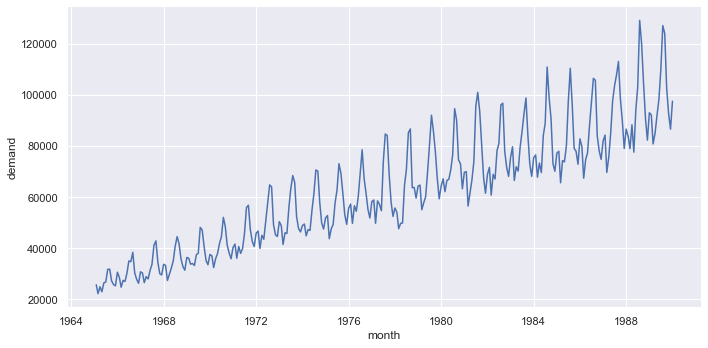

In [6]:
_g = sns.relplot(x=ts_demand.index, y=ts_demand, kind='line', aspect=2)
plt.show()

### Prepare the time series

Take the natural logarithm so an additive model is appropriate.

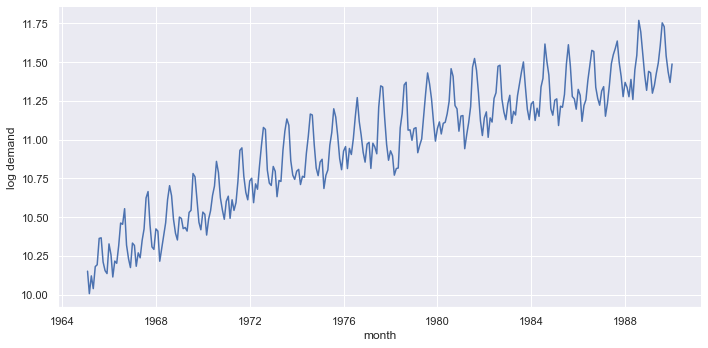

In [7]:
ts_logdemand = ts_demand.map(np.log).rename('log demand')
_g = sns.relplot(x=ts_logdemand.index, y=ts_logdemand, kind='line', aspect=2)
plt.show()

Decompose the time series.

In [8]:
decomp = tsa.seasonal_decompose(ts_logdemand)
sadjusted = pd.Series(
    data=decomp.observed - decomp.seasonal,
    name='log demand'
)

Construct a `DataFrame` holding both the (log) *observed* and *seasonally adjusted* time series.

In [9]:
all_ts_logdemand = pd.merge(
    left=ts_logdemand.rename('obs'),
    right=pd.Series(
        data=decomp.observed - decomp.seasonal,
        name='sadjusted'
    ),
    left_index=True,
    right_index=True
)
all_ts_logdemand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1965-01-31 to 1989-12-31
Freq: M
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   obs        300 non-null    float64
 1   sadjusted  300 non-null    float64
dtypes: float64(2)
memory usage: 15.1 KB


Plot the two time series, *observed* and *sadjusted*.

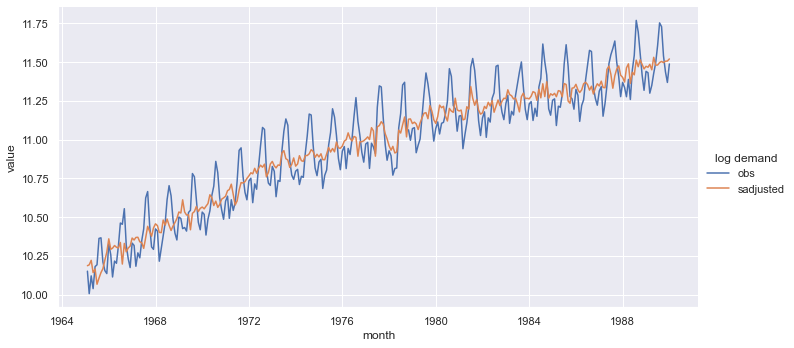

In [10]:
_gsource = all_ts_logdemand.melt(
    var_name='log demand',
    ignore_index=False
).reset_index()

_g = sns.relplot(
            data=_gsource,
            x='month',
            y='value',
            hue='log demand',
            kind='line',
            aspect=2
)

### Difference the time series

Time series of first differences.

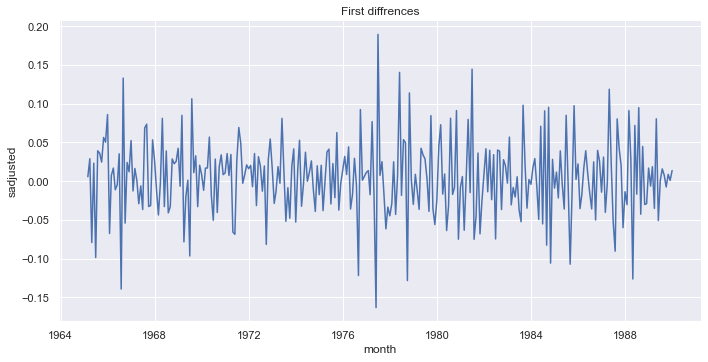

In [11]:
diff1 = all_ts_logdemand['sadjusted'].diff().dropna()
g = sns.relplot(x=diff1.index, y=diff1, kind='line', aspect=2)
plt.title('First diffrences')
plt.show()

Time series of first differences.

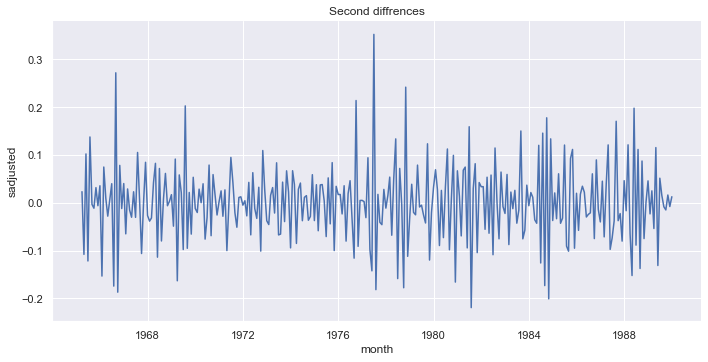

In [12]:
diff2 = diff1.diff().dropna()
g = sns.relplot(x=diff2.index, y=diff2, kind='line', aspect=2)
plt.title('Second diffrences')
plt.show()

[^1]: In other words, ignore the `periods` argument of `Series.diff`